# Monte Carlo Simulation for Stock Price Prediction
This project uses the **Monte Carlo simulation** method to predict the future stock prices of **Tesla (TSLA)**. The simulation is based on historical daily returns and models the possible future price paths. The goal of the simulation is to generate multiple random price paths and estimate the potential future range of Tesla's stock price over a short time horizon.

## Features

- **Data Download**: Downloads historical stock data for Tesla from Yahoo Finance (yfinance).
- **Daily Return Calculation**: Calculates the daily percentage change in stock prices.
- **Monte Carlo Simulation**: Simulates multiple future stock price paths based on historical returns.
- **Visualization**: Visualizes the simulated stock price paths and provides the expected price range (mean, 5th percentile, and 95th percentile).
- **Forecasting**: Generates a forecast of Tesla's stock price for the next 5 days.

## Requirements

To run this project, you will need the following Python packages:

- `yfinance` - For downloading stock data from Yahoo Finance.
- `numpy` - For numerical operations and simulations.
- `pandas` - For data manipulation and analysis.
- `matplotlib` - For plotting graphs.

You can install all dependencies by running:

```bash
pip install -r requirements.txt
```

## **Usage**
1. Clone the Repository:
```bash
git clone https://github.com/Poulami-Nandi/MonteCarloSimStockPred.git
cd MonteCarloSimStockPred
```
2. Download and Preprocess Data:
In the script monte_carlo_simulation.py, the historical stock data for Tesla (TSLA) is downloaded using the yfinance library, and daily returns are calculated.

3. Run the Monte Carlo Simulation:
Once the data is prepared, run the simulation to predict Tesla's stock price for the next 5 days.

```bash
python Monte_Carlo_Simulation_stock_prediction.py
```
4. Visualize the Results:
The script will generate a plot of the Monte Carlo simulations, showing multiple simulated price paths for the next 5 days. The graph will also display the last known price (today’s closing price) and highlight the mean, 5th percentile, and 95th percentile predicted prices for the next 5 days.

```bash
python Monte_Carlo_Simulation_stock_prediction.py
```

Example Output
Monte Carlo Simulation Plot: A graph showing 1000 simulated price paths for Tesla stock over the next 5 days.
Summary Statistics:
* Mean predicted price for the next 5 days
* 98th percentile predicted price (lower bound)
* 95th percentile predicted price (upper bound)

## **Directory Structure**
```bash
tesla-stock-price-monte-carlo/
│
├── data/                         # Contains raw and processed data
│   ├── TSLA_stock_data.csv      # Raw data of Tesla stock (from Yahoo Finance)
│
├── scripts/                      # Python scripts for running the simulation
│   ├── Monte_Carlo_Simulation_stock_prediction.py # Script for performing the Monte Carlo simulation and plotting results
|
├── notebooks/
|   ├── Monte_Carlo_Simulation_stock_prediction.ipynb  # ipynb file for monte carlo simulation
│
├── requirements.txt              # List of required Python packages
├── README.md                     # Project overview and instructions
```

## **License**
This project is licensed under the MIT License - see the LICENSE file for details.

In [73]:
#@title Doing Monte Carlo again
!pip install numpy pandas pandas-datareader matplotlib seaborn scipy yfinance
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import yfinance as yf
from datetime import datetime, timedelta

In [74]:
#@title define start date end date and ticker name
ticker = "TSLA"
start_date = '2020-1-1'
end_date = '2025-1-31'

In [75]:
#@title function to download stock data
def download_stock_data(ticker, start, end):
    # Define a Dataframe for storing your stock data
    data = pd.DataFrame()

    # Using Yahoo Finance to get stock data
    stock = yf.Ticker(ticker)
    data = stock.history(start=start, end=end)
    return data

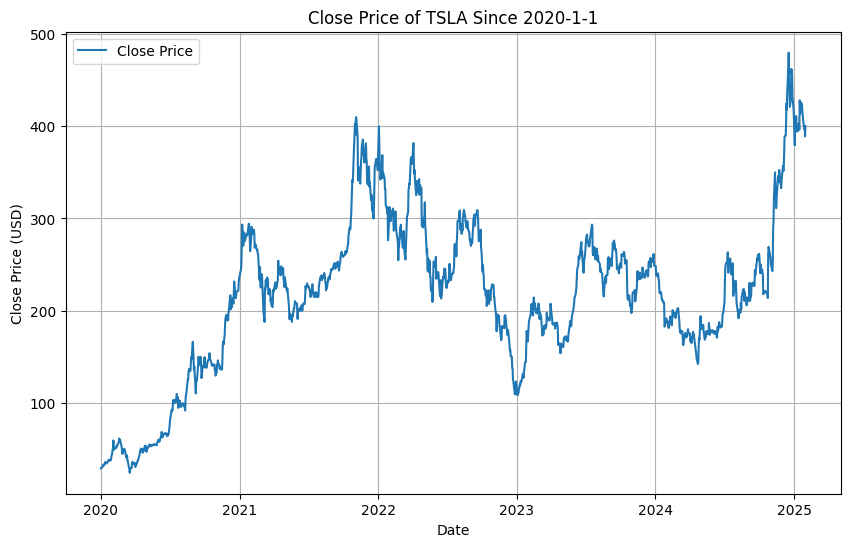

In [76]:
#@title Plot closing price
data = download_stock_data(ticker, start = start_date, end=end_date)

# Plot the close price
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.title(f'Close Price of {ticker} Since {start_date}')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

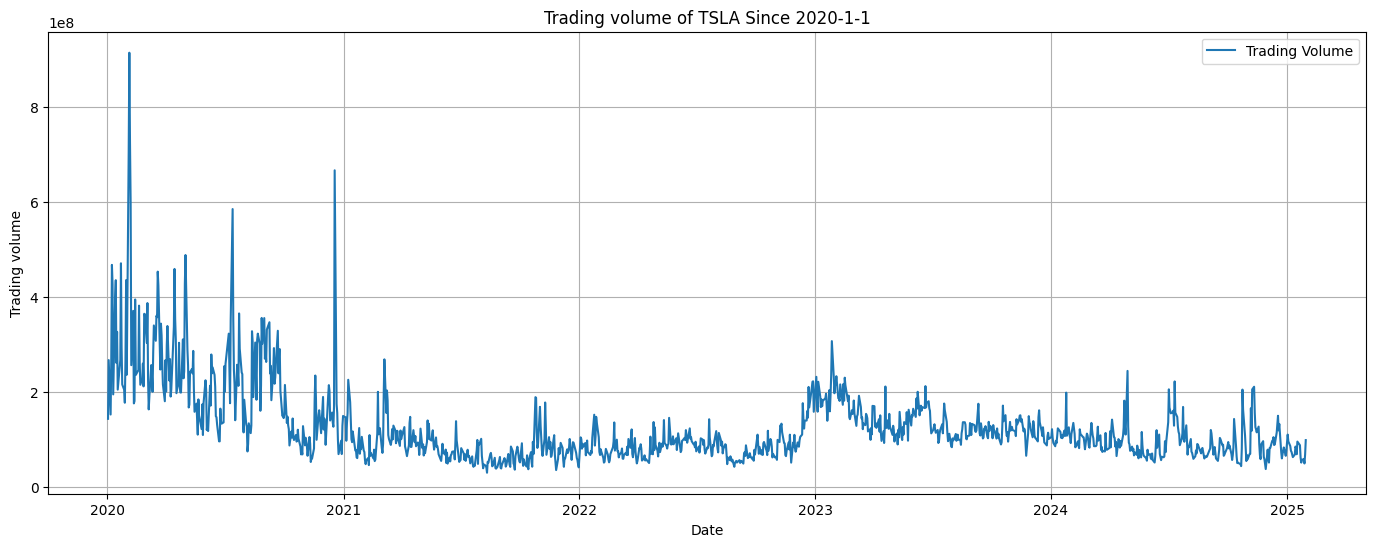

In [77]:
#@title Plot Volume
data = download_stock_data(ticker, start = start_date, end=end_date)

# Plot the close price
plt.figure(figsize=(17, 6))
plt.plot(data['Volume'], label='Trading Volume')
plt.title(f'Trading volume of {ticker} Since {start_date}')
plt.xlabel('Date')
plt.ylabel('Trading volume')
plt.legend()
plt.grid(True)
plt.show()

In [78]:
#@title Capture daily returns
def capture_daily_returns(stock_data):

    # Calculate the daily return based on Close price
    log_returns = np.log(1 + stock_data['Close'].pct_change())
    log_returns = log_returns[1:]

    return log_returns

Date
2025-01-24 00:00:00-05:00   -0.014165
2025-01-27 00:00:00-05:00   -0.023467
2025-01-28 00:00:00-05:00    0.002364
2025-01-29 00:00:00-05:00   -0.022842
2025-01-30 00:00:00-05:00    0.028328
Name: Close, dtype: float64


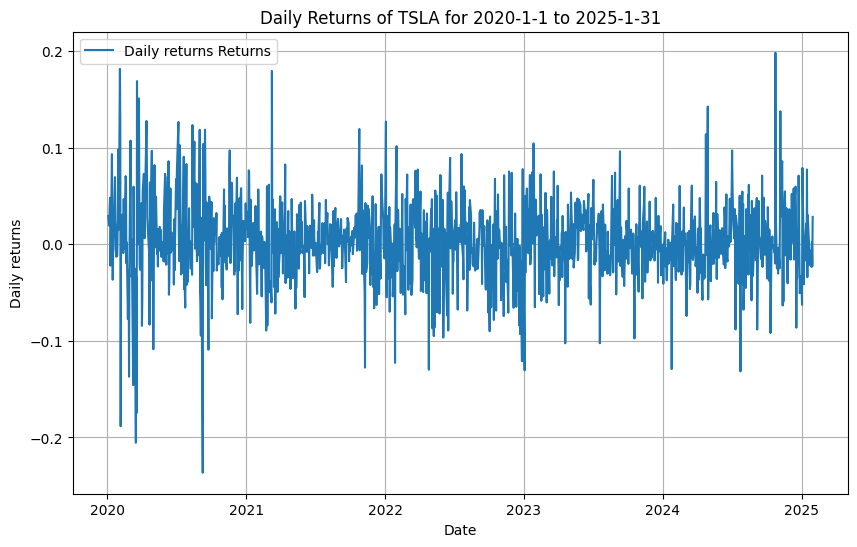

In [79]:
#@title Plot daily retuns over time
data = download_stock_data(ticker, start = start_date, end=end_date)
log_return = capture_daily_returns(data)
print(log_return.tail())

# Plot the log returns
plt.figure(figsize=(10, 6))
plt.plot(log_return, label='Daily returns Returns')
plt.title(f'Daily Returns of {ticker} for {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Daily returns')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
#@title Calculate Volatility
def calculate_volatility(daily_return):
    daily_volatility = np.std(daily_return)
    return daily_volatility

# Check volatility of the stock
data = download_stock_data(ticker, start = start_date, end=end_date)
daily_return = capture_daily_returns(data)
print(daily_return.tail())
print(calculate_volatility(daily_return))

Date
2025-01-24 00:00:00-05:00   -0.014165
2025-01-27 00:00:00-05:00   -0.023467
2025-01-28 00:00:00-05:00    0.002364
2025-01-29 00:00:00-05:00   -0.022842
2025-01-30 00:00:00-05:00    0.028328
Name: Close, dtype: float64
0.04209227956274724


In [81]:
#@title define and run the Monte Carlo Simulation function
num_simulations = 1000
num_days = 10
log_return
# get the stock data for the final time and use it
data = download_stock_data(ticker, start = start_date, end = end_date)
# Get the closing price for the last day of the stock data
last_price = data['Close'].iloc[-1]

# define monte carlo function
def execute_monte_carlo(num_simulations, num_days, last_price, daily_return):
    # Calculate daily volatility
    daily_vol = calculate_volatility(daily_return)

    # Initialize a list to store all simulation results
    all_simulations = []

    for x in range(num_simulations):
        price_series = [last_price]

        for y in range(1, num_days):
            price = price_series[-1] * (1 + np.random.normal(0, daily_vol))
            price_series.append(price)

        all_simulations.append(price_series)

    # Convert the list of simulations into a DataFrame all at once
    simulation_df = pd.DataFrame(all_simulations).transpose()

    return simulation_df

daily_return = capture_daily_returns(data)
# execute monte carlo simulation function
simulation_df = execute_monte_carlo(num_simulations, num_days, last_price, daily_return)

simulation_df.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,...,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999,400.279999
1,403.586348,381.314576,394.249821,408.489749,415.428621,386.328374,406.033223,393.439611,392.814832,391.490975,...,375.171484,391.776352,399.063977,427.276806,381.926860,395.563582,413.334154,372.545421,405.015919,373.369642
2,418.871288,371.200148,388.551075,419.924466,405.372423,384.279000,430.888577,410.206012,385.034120,373.473810,...,363.385083,378.474980,422.174125,454.330656,377.490944,409.968284,405.195612,363.602723,418.803373,385.156993
3,393.410194,367.447213,384.589334,418.606003,415.582161,358.127737,433.013459,411.686695,383.442166,371.613044,...,356.317722,352.707407,439.129379,459.732180,399.375881,419.537047,397.216902,362.433594,440.475298,400.719783
4,396.609190,352.943095,401.300925,395.145702,423.501886,361.019529,441.884186,409.141135,378.284880,347.071054,...,356.794451,367.263119,459.079988,429.571930,414.056035,410.630927,400.376312,367.183938,430.204928,408.673270


In [82]:
end_date

'2025-1-31'

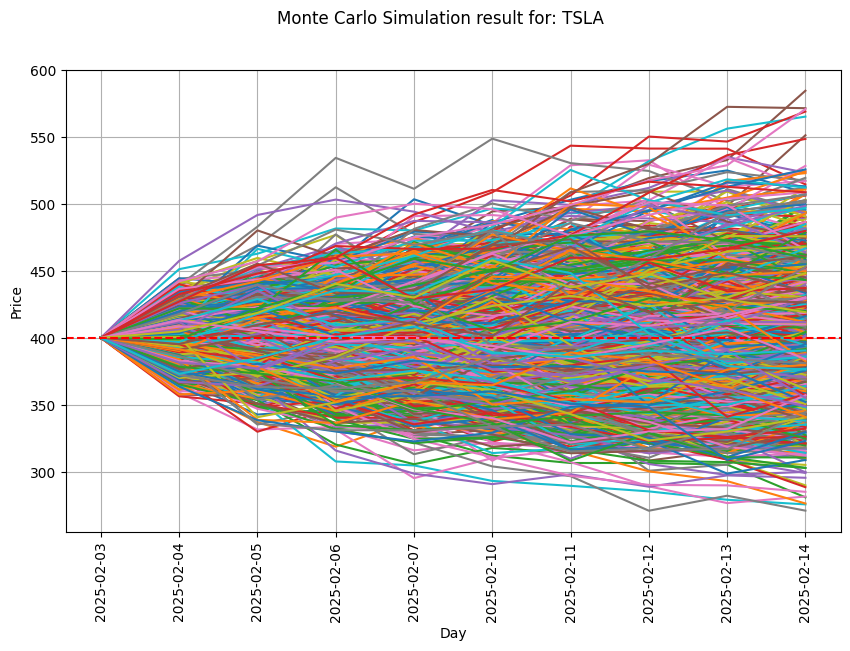

In [83]:
#@title Plot Monte Carlo result
simulation_df.plot(legend=False, figsize=(10, 6))
forecast_dates = pd.date_range(start=end_date, periods=num_days + 1, freq='B')[1:]  # Skip the start date and generate business days
plt.suptitle(f'Monte Carlo Simulation result for: {ticker}')
# Set the x-ticks to be the forecast dates
plt.xticks(ticks=np.arange(num_days), labels=forecast_dates.strftime('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.axhline(y=last_price, color='red', linestyle='--', label=f'Last Price: {last_price}')
plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [84]:
#@title Explore the monte carlo simulation result
import statistics
simulation_df.info()
#print(f"First simulation/prediction day result: \n{simulation_df.iloc[0]}\nand stdev for the first day: {statistics.stdev(simulation_df.iloc[0])}")
#print(f"Second simulation/prediction day result: \n{simulation_df.iloc[1]}\nand stdev for the second day: {statistics.stdev(simulation_df.iloc[1])}")
for i in range(0,10):
  print(f"simulation day {i} stdev: {statistics.stdev(simulation_df.iloc[i])}")

# Extract the prices for the next day after end_date
next_day_price = simulation_df.iloc[0]

# Calculate the 95% confidence interval
lower_bound = np.percentile(next_day_price, 2.5)
upper_bound = np.percentile(next_day_price, 97.5)

# Calculate the mean (expected) price
mean_price = np.mean(next_day_price)

# Print the results
print(f"The expected price for next day is: {mean_price}")
print(f"The 95% confidence interval for next day price is: ({lower_bound}, {upper_bound})")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 1000 entries, 0 to 999
dtypes: float64(1000)
memory usage: 78.3 KB
simulation day 0 stdev: 0.0
simulation day 1 stdev: 16.842701270502534
simulation day 2 stdev: 24.241175278862315
simulation day 3 stdev: 30.334180039831377
simulation day 4 stdev: 34.546256006658815
simulation day 5 stdev: 38.7915402114228
simulation day 6 stdev: 42.71966890600714
simulation day 7 stdev: 45.401381616551554
simulation day 8 stdev: 47.53709038794886
simulation day 9 stdev: 50.446896000441086
The expected price for next day is: 400.2799987792969
The 95% confidence interval for next day price is: (400.2799987792969, 400.2799987792969)


In [85]:
#@title write a function to calculate mean, 95% CI and 98% CI price for next 10 days
def calculate_percentile_price_for_days(simulation_df, days, end_date):
  for i in range(0,days):
    #print(f"simulation day {i} stdev: {statistics.stdev(simulation_df.iloc[i])}")
    # calulate next day from end_date
    next_business_day = pd.to_datetime(end_date) + pd.offsets.BDay(1 + i)
    #print(f"The next business day after {end_date} is {next_business_day.strftime('%Y-%m-%d')}")
    # Extract the prices for the next
    # Extract the prices for the next day after end_date
    next_day_price = simulation_df.iloc[0 + i]

    # Calculate the 95% confidence interval
    lower_bound = np.percentile(next_day_price, 2.5)
    upper_bound = np.percentile(next_day_price, 97.5)
    # Calculate the mean (expected) price
    mean_price = np.mean(next_day_price)
    # 98% CI price
    lower_bound_98 = np.percentile(next_day_price, 1)
    upper_bound_98 = np.percentile(next_day_price, 99)
    # Print the results
    print(f"The mean price {next_business_day.strftime('%Y-%m-%d')} is: {round(mean_price,2)}, The 95% CI price: ({round(lower_bound,2)}, {round(upper_bound,2)}), The 98% CI price: ({round(lower_bound_98,2)}, {round(upper_bound_98,2)})")

calculate_percentile_price_for_days(simulation_df, 10, end_date)


The mean price 2025-02-03 is: 400.28, The 95% CI price: (400.28, 400.28), The 98% CI price: (400.28, 400.28)
The mean price 2025-02-04 is: 400.71, The 95% CI price: (368.73, 434.93), The 98% CI price: (363.97, 440.37)
The mean price 2025-02-05 is: 400.03, The 95% CI price: (355.24, 448.87), The 98% CI price: (347.59, 455.57)
The mean price 2025-02-06 is: 400.51, The 95% CI price: (343.61, 460.53), The 98% CI price: (333.8, 468.66)
The mean price 2025-02-07 is: 400.75, The 95% CI price: (334.1, 469.0), The 98% CI price: (325.04, 480.43)
The mean price 2025-02-10 is: 401.26, The 95% CI price: (330.94, 478.9), The 98% CI price: (321.15, 487.21)
The mean price 2025-02-11 is: 400.89, The 95% CI price: (322.83, 487.55), The 98% CI price: (315.57, 500.23)
The mean price 2025-02-12 is: 401.61, The 95% CI price: (322.1, 497.68), The 98% CI price: (308.79, 516.56)
The mean price 2025-02-13 is: 401.24, The 95% CI price: (316.27, 502.17), The 98% CI price: (307.64, 523.7)
The mean price 2025-02-14

In [86]:
#@title Monte Carlo Simulation functions for given Ticker, Start and End date, number of Prediction days
class Monte_Carlo_Sim():

    def __init__(self, ticker, start_date, end_date, nr_of_days, nr_of_sim):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.nr_of_sim = nr_of_sim
        self.nr_of_days = nr_of_days

        self.download_stock_data()
        self.capture_daily_returns()
        self.calculate_volatility()
        self.execute_monte_carlo()

    def download_stock_data(self):
        self.data = pd.DataFrame()

        # Using Yahoo Finance to download stock data
        stock = yf.Ticker(self.ticker)
        self.data = stock.history(start=self.start_date, end=self.end_date)
        self.data.to_csv(f"{self.ticker}_stock_data.csv")


    def capture_daily_returns(self):

        # calculate daily returns from Close price
        self.daily_returns = np.log(1 + self.data['Close'].pct_change())
        self.daily_returns = self.daily_returns[1:]

    def calculate_volatility(self):
        self.daily_volatility = np.std(self.daily_returns)

    def execute_monte_carlo(self):
        # Get the last days stock price
        last_price = self.data['Close'].iloc[-1]
        self.last_price = last_price

        # Initialize a list to store all simulation results
        all_simulations = []

        for x in range(self.nr_of_sim):
            price_series = [last_price]

            for y in range(1, self.nr_of_days):
                price = price_series[-1] * (1 + np.random.normal(0, self.daily_volatility))
                price_series.append(price)

            all_simulations.append(price_series)

        # Convert the list of simulations into a DataFrame all at once
        self.simulation_df = pd.DataFrame(all_simulations).transpose()


    def calculate_percentile_price_for_days(self):
        for i in range(0,self.nr_of_days):
            #print(f"simulation day {i} stdev: {statistics.stdev(simulation_df.iloc[i])}")
            # calulate next day from end_date
            next_business_day = pd.to_datetime(self.end_date) + pd.offsets.BDay(1 + i)
            #print(f"The next business day after {end_date} is {next_business_day.strftime('%Y-%m-%d')}")
            # Extract the prices for the next
            # Extract the prices for the next day after end_date
            next_day_price = self.simulation_df.iloc[0 + i]

            # Calculate the 95% confidence interval
            lower_bound = np.percentile(next_day_price, 2.5)
            upper_bound = np.percentile(next_day_price, 97.5)
            # Calculate the mean (expected) price
            mean_price = np.mean(next_day_price)
            # 98% CI price
            lower_bound_98 = np.percentile(next_day_price, 1)
            upper_bound_98 = np.percentile(next_day_price, 99)
            # Print the results
            print(f"The mean price {next_business_day.strftime('%Y-%m-%d')} is: {round(mean_price,2)}, The 95% CI price: ({round(lower_bound,2)}, {round(upper_bound,2)}), The 98% CI price: ({round(lower_bound_98,2)}, {round(upper_bound_98,2)})")


    def simulation_plot(self):
        self.simulation_df.plot(legend=False, figsize=(15, 6))
        plt.suptitle(f'Monte Carlo Simulation result for: {self.ticker}')
        forecast_dates = pd.date_range(start=self.end_date, periods=self.nr_of_days + 1, freq='B')[1:]  # Skip the start date and generate business days
        # Set the x-ticks to be the forecast dates
        plt.xticks(ticks=np.arange(num_days), labels=forecast_dates.strftime('%Y-%m-%d'))
        plt.xticks(rotation=90)
        plt.axhline(y=self.last_price, color='red', linestyle='--', label=f'Last Price: {self.last_price}')
        plt.xlabel('Day')
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()


    def plot_stock_data_column(self, column):
        plt.figure(figsize=(15, 6))
        plt.plot(self.data[column], label=f'{column}')
        plt.title(f'{column} of {self.ticker} Since {self.start_date} to {self.end_date}')
        plt.xlabel('Date')
        plt.ylabel(f'{column}')
        plt.legend()
        plt.grid(True)


The mean price 2025-02-03 is: 400.28, The 95% CI price: (400.28, 400.28), The 98% CI price: (400.28, 400.28)
The mean price 2025-02-04 is: 400.37, The 95% CI price: (371.14, 429.46), The 98% CI price: (365.53, 435.39)
The mean price 2025-02-05 is: 400.69, The 95% CI price: (359.9, 442.37), The 98% CI price: (353.21, 450.27)
The mean price 2025-02-06 is: 400.28, The 95% CI price: (351.29, 451.7), The 98% CI price: (342.11, 460.96)
The mean price 2025-02-07 is: 400.39, The 95% CI price: (343.55, 459.58), The 98% CI price: (335.06, 470.16)
The mean price 2025-02-10 is: 400.68, The 95% CI price: (338.69, 467.56), The 98% CI price: (327.9, 480.46)
The mean price 2025-02-11 is: 400.76, The 95% CI price: (332.32, 475.48), The 98% CI price: (320.97, 491.03)
The mean price 2025-02-12 is: 400.62, The 95% CI price: (328.76, 482.61), The 98% CI price: (316.45, 495.79)
The mean price 2025-02-13 is: 400.37, The 95% CI price: (324.46, 487.21), The 98% CI price: (310.47, 505.0)
The mean price 2025-02-

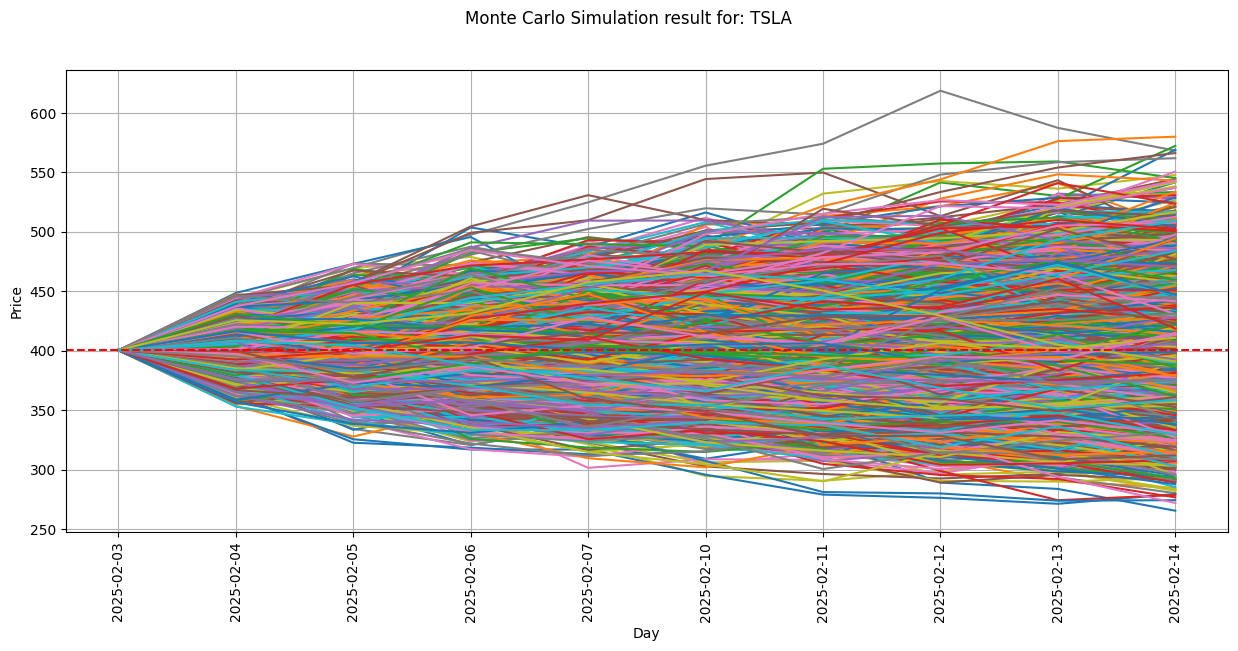

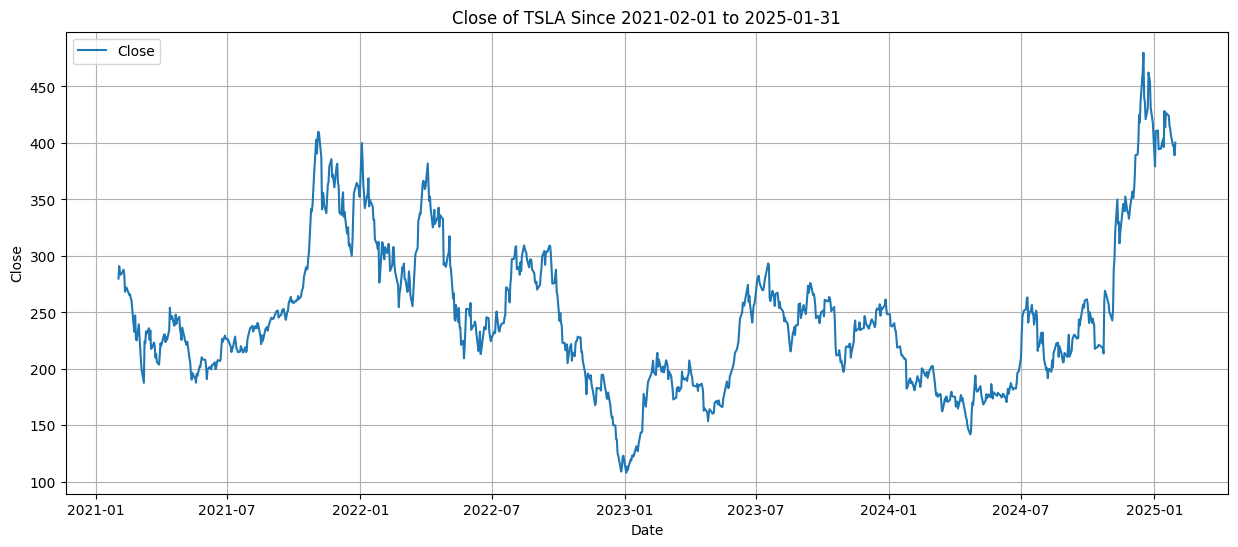

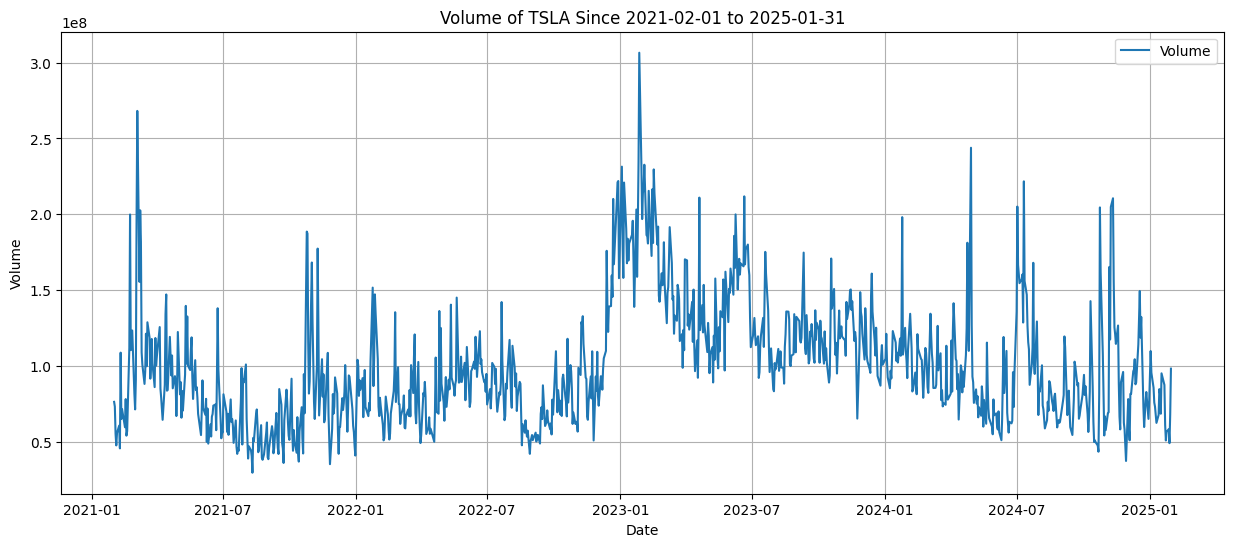

In [87]:
#@title Execute Monte Carlo simulatiion using Monte_Carlo_Sim class
# Define your list of tickers
tickers = ["TSLA"]

# Get today's date
today = datetime.now().strftime('%Y-%m-%d')
# Convert today's date to a pandas datetime object
today_date = pd.to_datetime(today)
# Get the previous business day
previous_business_day = today_date - pd.offsets.BDay(1)
# Format the previous business day as a string
previous_business_day_str = previous_business_day.strftime('%Y-%m-%d')

end_date = previous_business_day_str  # previous businesss date in YYYY-MM-DD format
start_date = (previous_business_day - timedelta(days=4*365)).strftime('%Y-%m-%d')  # 4 years before the last business day


# dict to jhold results
results = {}

# Loop through each ticker and run the simulation
for ticker in tickers:
    simulation = Monte_Carlo_Sim(ticker, start_date, end_date, 10, 5000)
    simulation.calculate_percentile_price_for_days()
    simulation.simulation_plot()
    simulation.plot_stock_data_column('Close')
    simulation.plot_stock_data_column('Volume')